In [2]:
pip install -q tflite-model-maker

In [5]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from torchvision import datasets, transforms
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from pathlib import Path
import imghdr

import matplotlib.pyplot as plt

Load data from dir

In [ ]:
#dataset = datasets.ImageFolder('drive/MyDrive/test')
data = DataLoader.from_folder('drive/MyDrive/test/')
train_data, test_data = data.split(0.7)

data_dir = "drive/MyDrive/test"

img_type_accepted_by_tf = [".png", ".jpg", "jpeg"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

Crate image clasification model

In [7]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 11s 3s/step - loss: 1.7882 - accuracy: 0.1979
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 1.5816 - accuracy: 0.3229
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.3204 - accuracy: 0.5625
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.0913 - accuracy: 0.7083
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 0.8688 - accuracy: 0.7917


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [9]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 6s 2s/step - loss: 0.9131 - accuracy: 0.7800


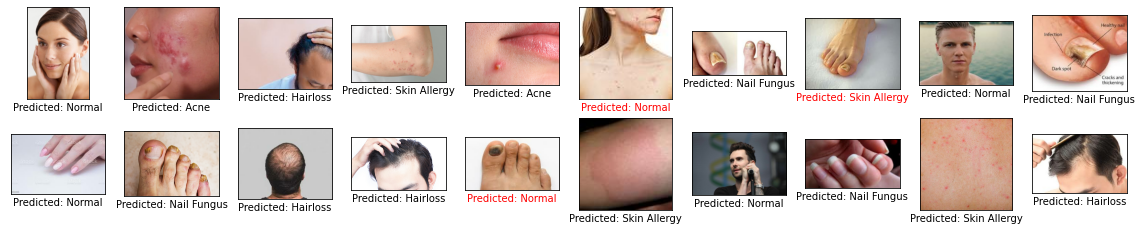

In [10]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(20)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='model')

INFO:tensorflow:Assets written to: /tmp/tmpco8jgs45/assets


INFO:tensorflow:Assets written to: /tmp/tmpco8jgs45/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp7s2mq7vm/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp7s2mq7vm/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: model/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: model/model.tflite
